In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('data_org/train/',
                                       target_size=(128,128),
                                       batch_size=5,
                                       class_mode='categorical')
validation_data=validation.flow_from_directory('data_org/validation',
                                              target_size=(128,128),
                                              batch_size=5,
                                              class_mode='categorical')

Found 194 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

C:\Users\JAY\AppData\Local\Temp\ipykernel_1124\2660331953.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [6]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(
        hp.Int('conv1_units', min_value=16, max_value=64, step=8),
        (3, 3), 1, activation='relu', input_shape=(128, 128, 3)
    ))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(
        hp.Int('conv2_units', min_value=16, max_value=64, step=8),
        (3, 3), 1, activation='relu'
    ))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Conv2D(
        hp.Int('conv3_units', min_value=16, max_value=64, step=8),
        (3, 3), 1, activation='relu'
    ))
    model.add(layers.MaxPooling2D())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(
        hp.Int('dense1_units', min_value=64, max_value=256, step=16),
        activation='relu'
    ))
    
    model.add(layers.Dense(
        hp.Int('dense2_units', min_value=64, max_value=256, step=16),
        activation='relu'
    ))
    
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [7]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='new_project'
)

tuner.search(train_dataset, epochs=20, validation_data=validation_data)

best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 03m 20s]
val_accuracy: 0.875

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 14m 46s
INFO:tensorflow:Oracle triggered exit


NameError: name 'best_models' is not defined

In [9]:
tuner.get_best_hyperparameters()[0].values

{'conv1_units': 24,
 'conv2_units': 64,
 'conv3_units': 64,
 'dense1_units': 208,
 'dense2_units': 160}

In [8]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        13888     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

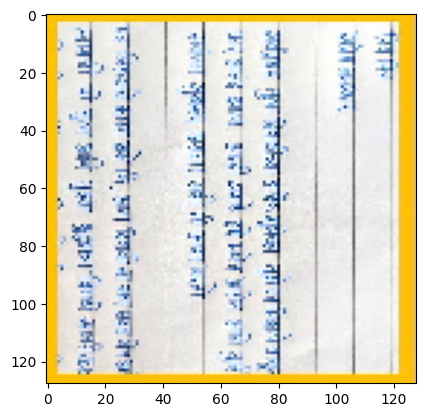

In [11]:
img=image.load_img('sddefault_right.jpg',target_size=(128,128))
plt.imshow(img)
plt.show()

In [12]:
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
y_hat=best_model.predict(y)
y_hat

1/1 [==============================] - 0s 117ms/step


array([[0., 0., 1., 0.]], dtype=float32)